#### Exam 2 Solution 

The required packages are imported into the notebook.

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import recall_score
from  sklearn.metrics import accuracy_score
from  sklearn.metrics import precision_score

import warnings
warnings.filterwarnings('ignore')

In [246]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The train csv files for cardiac arrhythmia dataset is loaded into dataframes

Since we have '?' in the dataset, we are replacing it by null values.

In [247]:
train=pd.read_csv("train.csv", na_values='?')

#### Preprocessing the Train dataset

In [248]:
train.info(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 281 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   age                           int64  
 2   sex                           int64  
 3   height                        int64  
 4   weight                        int64  
 5   QRSduration                   int64  
 6   PRinterval                    int64  
 7   Q-Tinterval                   int64  
 8   Tinterval                     int64  
 9   Pinterval                     int64  
 10  QRS                           int64  
 11  T                             float64
 12  P                             float64
 13  QRST                          float64
 14  J                             float64
 15  heartrate                     float64
 16  chDI_Qwave                    int64  
 17  chDI_Rwave                    int64  
 18  chDI_Swave                   

In [249]:
train.head(10)

,Unnamed: 0,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,124,37,1,159,56,75,162,339,141,96,...,0.0,5.0,-1.3,0.0,0,0.4,1.2,9.4,16.6,1
1,54,52,0,165,80,88,202,369,113,97,...,-0.5,10.7,-1.7,0.0,0,0.4,-0.3,19.6,17.7,16
2,298,12,1,165,47,91,0,359,152,0,...,0.0,8.8,-0.6,0.0,0,-0.4,1.6,24.0,38.0,10
3,311,80,0,160,70,90,201,404,157,111,...,0.0,13.0,-1.9,0.0,0,0.9,0.4,26.7,30.3,1
4,230,72,0,171,74,77,172,330,140,104,...,0.0,6.8,0.0,0.0,0,0.7,0.8,25.8,31.4,1
5,134,41,1,155,56,80,134,362,156,58,...,0.0,7.1,-1.4,0.0,0,0.6,2.9,12.8,38.9,10
6,12,54,1,172,58,78,155,382,163,81,...,0.0,6.3,-2.1,0.0,0,0.8,0.5,8.8,12.1,10
7,388,44,0,170,84,188,125,458,261,75,...,0.0,12.0,0.0,0.0,0,0.5,-6.0,86.4,8.4,9
8,392,51,1,165,85,81,158,357,148,109,...,0.0,12.4,-1.9,0.0,0,0.5,1.0,31.3,37.5,1
9,76,45,0,177,72,94,164,431,158,81,...,-1.9,0.0,0.0,0.0,0,0.6,-2.2,-8.3,-38.6,3


In [250]:
train.describe()

,Unnamed: 0,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000,400.000000,400.000000
mean,225.977500,46.687500,0.552500,166.195000,67.857500,88.740000,155.955000,368.542500,169.597500,90.235000,...,-0.264250,9.025000,-1.491750,0.004500,0.0,0.520000,1.247250,19.149250,29.540750,3.902500
std,131.543019,16.858243,0.497859,39.398701,17.063708,15.321203,45.034634,33.225412,35.550317,25.326535,...,0.528768,3.490801,2.079596,0.053262,0.0,0.350367,1.429476,13.758867,19.119788,4.353202
min,0.000000,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,110.750000,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,352.000000,148.000000,79.000000,...,-0.400000,6.500000,-2.100000,0.000000,0.0,0.400000,0.500000,11.000000,16.700000,1.000000
50%,227.500000,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,368.000000,162.000000,90.500000,...,0.000000,8.750000,-1.200000,0.000000,0.0,0.500000,1.300000,18.100000,27.900000,1.000000
75%,342.250000,59.000000,1.000000,170.000000,79.000000,94.000000,175.000000,386.000000,178.000000,102.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.400000,6.000000
max,451.000000,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


We have a column 'Unnamed' which has logically no significance to the dataset. We do not have knowledge on the column. I could only be an ID. Hence we're dropping that column. 

In [251]:
train.drop(train.columns[0], inplace = True, axis = 1)

In [252]:
train.columns[train.isnull().any()]

Index(['T', 'P', 'QRST', 'J', 'heartrate'], dtype='object')

In [253]:
train.isnull().sum().sum()

359

In [254]:
train.isnull().sum().head(20)

age              0
sex              0
height           0
weight           0
QRSduration      0
PRinterval       0
Q-Tinterval      0
Tinterval        0
Pinterval        0
QRS              0
T                7
P               17
QRST             1
J              333
heartrate        1
chDI_Qwave       0
chDI_Rwave       0
chDI_Swave       0
chDI_RPwave      0
chDI_SPwave      0
dtype: int64

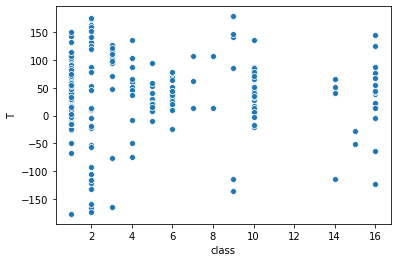

In [255]:
sns.scatterplot(x='class',y='T',data=train)

There are outliers in column T. Hence we are choosing median to fill the null values. 

In [256]:
train['T']=train['T'].fillna(train['T'].median())

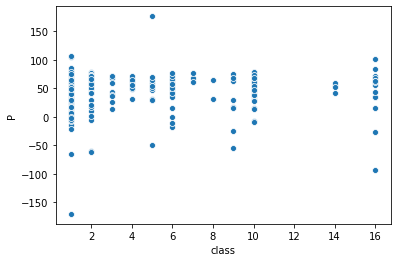

In [257]:
sns.scatterplot(x='class',y='P',data=train)

There is not much outliers in the column P. So we're using mean to fill null values.

In [258]:
train['P']=train['P'].fillna(train['P'].mean())

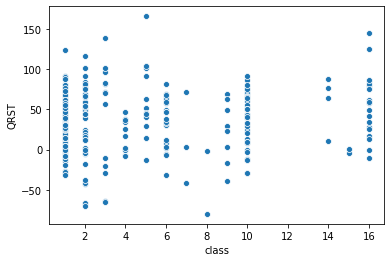

In [259]:
sns.scatterplot(x='class',y='QRST',data=train)

There is a significant number of outliers in this columns. Hence we're using median for filling null values.

In [260]:
train['QRST']=train['QRST'].fillna(train['QRST'].median())

In [261]:
train['J'].isnull().sum()

333

More than 75% of the values in column J is null values. Hence we're doppping that column.

In [262]:
train.drop(['J'], inplace = True, axis = 1)

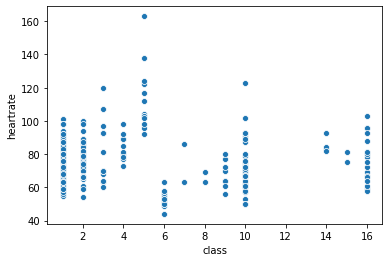

In [263]:
sns.scatterplot(x='class',y='heartrate',data=train)

There is not much outliers in this columns. Hence we are using mean to fill null values. 

In [264]:
train['heartrate']=train['heartrate'].fillna(train['heartrate'].mean())

In [265]:
train.describe()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000,400.000000,400.000000
mean,46.687500,0.552500,166.195000,67.857500,88.740000,155.955000,368.542500,169.597500,90.235000,34.252500,...,-0.264250,9.025000,-1.491750,0.004500,0.0,0.520000,1.247250,19.149250,29.540750,3.902500
std,16.858243,0.497859,39.398701,17.063708,15.321203,45.034634,33.225412,35.550317,25.326535,46.381049,...,0.528768,3.490801,2.079596,0.053262,0.0,0.350367,1.429476,13.758867,19.119788,4.353202
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,352.000000,148.000000,79.000000,2.750000,...,-0.400000,6.500000,-2.100000,0.000000,0.0,0.400000,0.500000,11.000000,16.700000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,368.000000,162.000000,90.500000,42.000000,...,0.000000,8.750000,-1.200000,0.000000,0.0,0.500000,1.300000,18.100000,27.900000,1.000000
75%,59.000000,1.000000,170.000000,79.000000,94.000000,175.000000,386.000000,178.000000,102.000000,67.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.400000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [266]:
train.head(20)

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,37,1,159,56,75,162,339,141,96,60,...,0.0,5.0,-1.3,0.0,0,0.4,1.2,9.4,16.6,1
1,52,0,165,80,88,202,369,113,97,58,...,-0.5,10.7,-1.7,0.0,0,0.4,-0.3,19.6,17.7,16
2,12,1,165,47,91,0,359,152,0,8,...,0.0,8.8,-0.6,0.0,0,-0.4,1.6,24.0,38.0,10
3,80,0,160,70,90,201,404,157,111,21,...,0.0,13.0,-1.9,0.0,0,0.9,0.4,26.7,30.3,1
4,72,0,171,74,77,172,330,140,104,33,...,0.0,6.8,0.0,0.0,0,0.7,0.8,25.8,31.4,1
5,41,1,155,56,80,134,362,156,58,59,...,0.0,7.1,-1.4,0.0,0,0.6,2.9,12.8,38.9,10
6,54,1,172,58,78,155,382,163,81,-24,...,0.0,6.3,-2.1,0.0,0,0.8,0.5,8.8,12.1,10
7,44,0,170,84,188,125,458,261,75,-12,...,0.0,12.0,0.0,0.0,0,0.5,-6.0,86.4,8.4,9
8,51,1,165,85,81,158,357,148,109,64,...,0.0,12.4,-1.9,0.0,0,0.5,1.0,31.3,37.5,1
9,45,0,177,72,94,164,431,158,81,116,...,-1.9,0.0,0.0,0.0,0,0.6,-2.2,-8.3,-38.6,3


In [267]:
train.isnull().sum().head(20)

age                           0
sex                           0
height                        0
weight                        0
QRSduration                   0
PRinterval                    0
Q-Tinterval                   0
Tinterval                     0
Pinterval                     0
QRS                           0
T                             0
P                             0
QRST                          0
heartrate                     0
chDI_Qwave                    0
chDI_Rwave                    0
chDI_Swave                    0
chDI_RPwave                   0
chDI_SPwave                   0
chDI_intrinsicReflecttions    0
dtype: int64

In [268]:
train.isnull().sum().sum()

0

In [269]:
train.head(10)

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,37,1,159,56,75,162,339,141,96,60,...,0.0,5.0,-1.3,0.0,0,0.4,1.2,9.4,16.6,1
1,52,0,165,80,88,202,369,113,97,58,...,-0.5,10.7,-1.7,0.0,0,0.4,-0.3,19.6,17.7,16
2,12,1,165,47,91,0,359,152,0,8,...,0.0,8.8,-0.6,0.0,0,-0.4,1.6,24.0,38.0,10
3,80,0,160,70,90,201,404,157,111,21,...,0.0,13.0,-1.9,0.0,0,0.9,0.4,26.7,30.3,1
4,72,0,171,74,77,172,330,140,104,33,...,0.0,6.8,0.0,0.0,0,0.7,0.8,25.8,31.4,1
5,41,1,155,56,80,134,362,156,58,59,...,0.0,7.1,-1.4,0.0,0,0.6,2.9,12.8,38.9,10
6,54,1,172,58,78,155,382,163,81,-24,...,0.0,6.3,-2.1,0.0,0,0.8,0.5,8.8,12.1,10
7,44,0,170,84,188,125,458,261,75,-12,...,0.0,12.0,0.0,0.0,0,0.5,-6.0,86.4,8.4,9
8,51,1,165,85,81,158,357,148,109,64,...,0.0,12.4,-1.9,0.0,0,0.5,1.0,31.3,37.5,1
9,45,0,177,72,94,164,431,158,81,116,...,-1.9,0.0,0.0,0.0,0,0.6,-2.2,-8.3,-38.6,3


In [270]:
train['height'].unique()

array([159, 165, 160, 171, 155, 172, 170, 177, 156, 169, 162, 167, 132,
       130, 175, 164, 173, 176, 124, 168, 180, 185, 166, 182, 163, 153,
       150, 110, 127, 157, 178, 780, 161, 190, 158, 181, 154, 119, 188,
       120, 133, 186, 140, 148, 174, 608, 184, 105, 149, 138, 179, 152,
       146], dtype=int64)

Height cannot be of values 608 and 780. Hence we're dropping those records.

In [271]:
train.drop(train.loc[train['height']==608].index, inplace=True)
train.drop(train.loc[train['height']==780].index, inplace=True)

In [272]:
train['height'].unique()

array([159, 165, 160, 171, 155, 172, 170, 177, 156, 169, 162, 167, 132,
       130, 175, 164, 173, 176, 124, 168, 180, 185, 166, 182, 163, 153,
       150, 110, 127, 157, 178, 161, 190, 158, 181, 154, 119, 188, 120,
       133, 186, 140, 148, 174, 184, 105, 149, 138, 179, 152, 146],
      dtype=int64)

In [273]:
train['weight'].unique()

array([ 56,  80,  47,  70,  74,  58,  84,  85,  72,  83,  53,  65,  67,
        75,  64,  52,  68,  33,  30,  60,  54, 176,  94,  25,  71,  77,
        88,  95,  66,  73,  48,  90,  61,  10,  22,  63,  40,  55, 104,
        82,  89,  51,  81,  78,  76,  38, 110,  21,  91,  98,  93,  28,
        62,  59,  43,  50,  69,  45,  79,  18,  24,  86, 100,  42, 124,
       105,  57,  96,  12, 106,  97,  29,  44,  46], dtype=int64)

In [274]:
train['age'].unique()

array([37, 52, 12, 80, 72, 41, 54, 44, 51, 45, 57, 60, 53, 40, 24, 56, 62,
       46, 59, 63,  9,  7, 66, 81, 47, 42, 67, 33, 35, 43, 61, 11, 77, 36,
       65, 49, 48, 50,  1, 34, 64, 38, 22, 19, 78, 30, 32, 27, 21, 39, 75,
       13, 31, 15, 28, 55, 69, 73,  8, 25, 26, 18, 70, 29, 74, 68, 58, 71,
       17, 20, 83,  3, 14, 76, 16, 79], dtype=int64)

In [275]:
train['heartrate'].unique()

array([ 81.        ,  59.        ,  68.        ,  67.        ,
        84.        ,  70.        ,  73.        ,  77.        ,
        75.        ,  63.        , 107.        ,  80.        ,
        72.        ,  65.        ,  66.        ,  93.        ,
        53.        ,  97.        ,  78.        ,  87.        ,
        71.        ,  76.        ,  74.        ,  61.        ,
        62.        ,  91.        , 103.        ,  64.        ,
        60.        ,  85.        , 102.        ,  58.        ,
        69.        , 104.        , 122.        , 101.        ,
        79.        ,  92.        ,  56.        ,  55.        ,
        82.        ,  89.        ,  98.        ,  83.        ,
        74.30075188,  86.        ,  54.        ,  96.        ,
       100.        ,  57.        ,  49.        ,  88.        ,
        50.        , 117.        , 123.        ,  51.        ,
        44.        ,  94.        , 124.        , 112.        ,
       120.        ])

In all other columns, the values seem good. 

In [276]:
train.head(10)

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,37,1,159,56,75,162,339,141,96,60,...,0.0,5.0,-1.3,0.0,0,0.4,1.2,9.4,16.6,1
1,52,0,165,80,88,202,369,113,97,58,...,-0.5,10.7,-1.7,0.0,0,0.4,-0.3,19.6,17.7,16
2,12,1,165,47,91,0,359,152,0,8,...,0.0,8.8,-0.6,0.0,0,-0.4,1.6,24.0,38.0,10
3,80,0,160,70,90,201,404,157,111,21,...,0.0,13.0,-1.9,0.0,0,0.9,0.4,26.7,30.3,1
4,72,0,171,74,77,172,330,140,104,33,...,0.0,6.8,0.0,0.0,0,0.7,0.8,25.8,31.4,1
5,41,1,155,56,80,134,362,156,58,59,...,0.0,7.1,-1.4,0.0,0,0.6,2.9,12.8,38.9,10
6,54,1,172,58,78,155,382,163,81,-24,...,0.0,6.3,-2.1,0.0,0,0.8,0.5,8.8,12.1,10
7,44,0,170,84,188,125,458,261,75,-12,...,0.0,12.0,0.0,0.0,0,0.5,-6.0,86.4,8.4,9
8,51,1,165,85,81,158,357,148,109,64,...,0.0,12.4,-1.9,0.0,0,0.5,1.0,31.3,37.5,1
9,45,0,177,72,94,164,431,158,81,116,...,-1.9,0.0,0.0,0.0,0,0.6,-2.2,-8.3,-38.6,3


#### Splitting the dataset

In [277]:
X = train.iloc[:,:278]
y =  train['class']

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

In [278]:
X_train_org.head()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA
255,66,1,160,124,99,154,329,172,95,-48,...,0.0,0.0,4.3,-5.2,0.0,0,0.6,1.7,-7.2,4.7
247,63,0,174,79,91,151,410,198,86,16,...,-0.7,0.0,4.7,-1.5,0.0,0,0.4,-1.4,7.6,-5.0
283,17,1,160,54,85,137,323,143,87,72,...,-0.6,-0.8,8.3,-1.8,0.0,0,0.9,1.3,10.4,18.4
82,27,1,161,51,70,142,413,158,51,70,...,0.2,0.0,8.6,0.0,0.0,0,0.4,2.2,29.2,49.8
349,27,1,160,42,78,153,374,165,85,23,...,1.4,-0.7,12.2,-2.4,0.0,0,0.5,1.9,11.0,25.0


#### Scaling the dataset

In [279]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


In [282]:
X_train

array([[0.79268293, 1.        , 0.625     , ..., 0.55670103, 0.27819549,
        0.2802589 ],
       [0.75609756, 0.        , 0.8       , ..., 0.2371134 , 0.38947368,
        0.21747573],
       [0.19512195, 1.        , 0.625     , ..., 0.51546392, 0.41052632,
        0.36893204],
       ...,
       [0.74390244, 1.        , 0.75      , ..., 0.40206186, 0.60827068,
        0.50161812],
       [0.58536585, 0.        , 0.7       , ..., 0.55670103, 0.41578947,
        0.41359223],
       [0.84146341, 1.        , 0.625     , ..., 0.42268041, 0.39172932,
        0.31779935]])

### KNN-Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

grid_parms_knn = {'n_neighbors':[1,5,10,15,20]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(KNeighborsClassifier(), grid_parms_knn,verbose = 1,cv = 3, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.6s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

Best parameters: {'n_neighbors': 5}
Best cross-validation score: 0.57


In [37]:
knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Train score: 0.6309
Test score: 0.5600


In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(knn , X_train, y_train, cv=kfold)))
scores = cross_val_score(knn , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.48       0.44       0.66       0.62       0.63265306 0.6122449 ]
0.5741496598639456


In [39]:
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

0.56

0.2313797313797314

In [40]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
 
knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)
ypred = knn.predict(X_test)
cm = confusion_matrix(ypred,y_test)
f = f1_score(ypred,y_test, average = None)
print(cm)
print(f)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

[[53  9  2  3  6  1 12  1  4]
 [ 1  0  0  0  0  1  0  0  0]
 [ 0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]]
[0.7260274 0.        0.5       0.        0.        0.        0.2
 0.        0.       ]


#### Logistic Regression 

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
penalty = ['l1', 'l2']
C = [0.01,0.1,1,10,100]
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [42]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.1, 'penalty': 'l1'}
Best cross-validation score: 0.69


In [43]:
log_l1 = LogisticRegression(penalty = 'l1', C = 0.1)
log_l1.fit(X_train, y_train)
print(log_l1.score(X_train, y_train))
print(log_l1.score(X_test, y_test))

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

0.5335570469798657
0.55


In [44]:
y_pred = log_l1.predict(X_test)
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

0.55

0.0617283950617284

In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
log_l1 = LogisticRegression(penalty = 'l1', C = 0.01)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(log_l1 , X_train, y_train, cv=kfold)))
scores = cross_val_score(log_l1 , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.48       0.44       0.64       0.56       0.51020408 0.57142857]
0.5336054421768708


In [46]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score
log_l1 = LogisticRegression(penalty = 'l1', C = 0.01)
log_l1.fit(X_train, y_train)
ypred = log_l1.predict(X_test)
ft = f1_score(ypred,y_test, average = None)
cm = confusion_matrix(ypred,y_test)
print(ft)
print(cm)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

[0.70967742 0.         0.         0.         0.         0.
 0.         0.         0.        ]
[[55  9  3  4  6  2 16  1  4]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]]


#### Linear SVC 

Since Linear SVC does not have any paramater, we don't need to run grid search.

In [47]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train,y_train)

print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

0.9530201342281879
0.73


In [48]:
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

0.73

0.37979166666666664

In [49]:
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(clf , X_train, y_train, cv=kfold)))
scores = cross_val_score(clf , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.62       0.56       0.7        0.66       0.7755102  0.73469388]
0.6750340136054422


#### SVC - Linear Kernel  

In [50]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
model = SVC(kernel = 'linear')

parameters = {'C': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model,parameters, cv=3, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None, param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [51]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1}
Best cross-validation score: 0.66


In [52]:
svc = SVC(kernel='linear', C=1)
svc.fit(X_train,y_train)

print(svc.score(X_train,y_train))
print(svc.score(X_test,y_test))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

0.8959731543624161
0.74


In [53]:
y_pred = svc.predict(X_test)
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

0.74

0.4831168831168831

In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=6)
#print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(svc , X_train, y_train, cv=kfold)
print(scores)
print(np.mean(scores))

[0.62       0.62       0.74       0.66       0.71428571 0.73469388]
0.6814965986394559


In [55]:
from sklearn.metrics import f1_score
svc = SVC(kernel = 'linear', C = 1 )
svc.fit(X_train, y_train)
ypred = svc.predict(X_test)
cm = confusion_matrix(ypred,y_test)
f = f1_score(ypred,y_test, average = None)
print(cm)
print(f)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

[[52  3  0  0  3  5  0  0  5  0  2]
 [ 0  6  0  0  0  0  0  0  0  1  0]
 [ 0  0  3  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0]
 [ 1  0  0  0  1  0  0  0 10  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]]
[0.832      0.75       1.         0.         0.         0.28571429
 0.         1.         0.66666667 0.         0.        ]


#### SVC - RBF Kernel 

In [56]:
from sklearn.model_selection import GridSearchCV
model = SVC(kernel = 'rbf')

parameters = {'C': [0.01, 0.1, 1, 10, 100], 'gamma' : [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [57]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.70


In [58]:
svc1 = SVC(kernel='rbf', gamma=0.01, C=100)
svc1.fit(X_train,y_train)

print(svc1.score(X_train,y_train))
print(svc1.score(X_test,y_test))

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.9563758389261745
0.72


In [59]:
y_pred = svc1.predict(X_test)
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

0.72

0.45722610722610724

In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=6)
#print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(svc1 , X_train, y_train, cv=kfold)
print(scores)
print(np.mean(scores))

[0.64       0.64       0.72       0.66       0.71428571 0.71428571]
0.6814285714285715


In [61]:
from sklearn.metrics import f1_score
svc1 = SVC(kernel = 'rbf', C = 100 , gamma = 0.01)
svc1.fit(X_train, y_train)
ypred = svc1.predict(X_test)
f = f1_score(ypred,y_test, average = None)
cm = confusion_matrix(ypred,y_test)
print(cm)
print(f)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

[[49  3  0  0  2  4  0  0  5  0  2]
 [ 1  6  0  0  0  0  0  0  0  1  0]
 [ 0  0  3  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  1  0  0]
 [ 1  0  0  0  0  2  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  1  0  0]
 [ 2  0  0  0  0  0  0  0  9  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0]]
[0.81666667 0.70588235 1.         0.         0.33333333 0.44444444
 0.         0.8        0.62068966 0.         0.        ]


#### SVC - Poly Kernel 

In [62]:
from sklearn.model_selection import GridSearchCV
model = SVC(kernel = 'poly')

parameters = {'C': [0.01, 0.1, 1, 10, 100], 'degree' : [2,3,4,5]}

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [63]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'degree': 2}
Best cross-validation score: 0.64


In [64]:
svc2 = SVC(kernel='poly', degree=2, C=100)
svc2.fit(X_train,y_train)

print(svc2.score(X_train,y_train))
print(svc2.score(X_test,y_test))

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

0.7348993288590604
0.63


In [65]:
y_pred = svc2.predict(X_test)
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

0.63

0.4213636363636364

In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=6)
#print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(svc2 , X_train, y_train, cv=kfold)
print(scores)
print(np.mean(scores))

[0.56       0.52       0.7        0.66       0.65306122 0.69387755]
0.631156462585034


In [67]:
from sklearn.metrics import f1_score
svc2 = SVC(kernel = 'poly', C = 100 , degree = 2)
svc2.fit(X_train, y_train)
ypred = svc2.predict(X_test)
f = f1_score(ypred,y_test, average = None)
cm = confusion_matrix(ypred,y_test)
print(cm)
print(f)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

[[54  8  0  0  3  6  0 13  1  3]
 [ 0  1  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  1  0  0  3  0  1]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]]
[0.75524476 0.2        1.         0.         0.         0.
 1.         0.28571429 0.         0.        ]


#### Decision Tree Classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

Accuracy on training set: 1.000
Accuracy on test set: 0.670


In [69]:
dtree_clf = DecisionTreeClassifier(random_state=0)
parameters = { 'max_depth' : [1,2,3,4,5,6,7,8,9,10]}

In [70]:
grid_search = GridSearchCV(dtree_clf,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [71]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 5}
Best cross-validation score: 0.63


In [283]:
dtree = DecisionTreeClassifier(max_depth=5, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

Accuracy on training set: 0.809
Accuracy on test set: 0.750


In [284]:
y_pred = dtree.predict(X_test)
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

0.75

0.5172516025641025

In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=6)
#print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(dtree , X_train, y_train, cv=kfold)
print(scores)
print(np.mean(scores))

[0.52       0.56       0.7        0.62       0.63265306 0.53061224]
0.5938775510204082


In [75]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score
dtree = DecisionTreeClassifier(max_depth=5, random_state=0)
dtree.fit(X_train, y_train)
ypred = dtree.predict(X_test)
cm = confusion_matrix(ypred,y_test)
ft = f1_score(ypred,y_test,average = None)
print(cm)
print(ft)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

[[51  3  0  0  1  2  0  5  0  2]
 [ 1  6  0  0  1  0  0  1  1  0]
 [ 0  0  2  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0]
 [ 0  0  1  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  1]
 [ 0  0  0  0  0  0  2  0  0  0]
 [ 3  0  0  0  0  0  0  9  0  1]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]]
[0.85714286 0.63157895 0.66666667 0.         0.57142857 0.6
 1.         0.62068966 0.         0.        ]


### Voting Methods

In [76]:
voting_clf = VotingClassifier(estimators=[('dtree', dtree), ('knn', knn), ('svc', svc)], voting='hard')
voting_clf.fit(X_train, y_train)

voting_clf.predict(X_test)
voting_clf.score(X_train,y_train)
voting_clf.score(X_test,y_test)
accuracy_score(y_test, y_pred)
precision_score(y_test,y_pred,average='macro')

VotingClassifier(estimators=[('dtree',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=5,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=0,
                                                     splitter='best')),
         

array([ 1,  1,  1,  1,  1,  1,  1, 10,  1,  1,  1,  1,  1, 10,  1,  2,  9,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2, 10,  1,  1,  1,  6,
        1, 10,  1,  1,  1,  1,  4,  1,  1,  1,  2, 10,  1, 10,  1,  1,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1, 10,  1,  1,  1,  1,  1,  1,  1,
        1,  9, 10,  1,  1,  1,  2,  1,  1,  1,  1,  1,  2,  1,  1,  3,  1,
        1,  1,  2,  1,  1,  1,  1,  3, 10,  1,  1,  1,  1,  1,  1],
      dtype=int64)

0.802013422818792

0.69

0.75

0.5172516025641025

In [77]:
dtree = DecisionTreeClassifier(max_depth = 5, random_state=0)
dtree.fit(X_train,y_train)
knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)
svc = SVC(kernel = 'linear', C = 1, probability = True)
svc.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('dtree', dtree), ('knn', knn), ('svc', svc)], voting='soft')
voting_clf.fit(X_train, y_train)

voting_clf.predict(X_test)
voting_clf.score(X_train,y_train)
voting_clf.score(X_test,y_test)
accuracy_score(y_test, y_pred)
precision_score(y_test,y_pred,average='macro')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

VotingClassifier(estimators=[('dtree',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=5,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=0,
                                                     splitter='best')),
         

array([ 1,  1,  1,  1,  1,  1,  1, 10,  1,  1,  1,  1,  1, 10,  1,  2,  9,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2, 10,  1,  1,  1,  6,
        1, 10,  1,  1,  1, 10, 10,  1,  1,  1,  2, 10,  1, 10,  1,  1,  1,
        1,  1,  1,  5,  1,  1,  1,  1,  1, 10,  1,  1,  1,  1,  1,  1,  1,
        1,  9, 10,  1,  1,  1,  2,  1,  1,  1,  6,  1,  2,  1,  1,  3,  1,
        6,  1,  1,  1, 10,  1,  1,  3, 10,  1,  1,  1,  1,  1,  1],
      dtype=int64)

0.8187919463087249

0.71

0.75

0.5172516025641025

#### Random Forest 

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs= -1,random_state=0)

param_grid = { 'n_estimators' : [100,200,300,400,500],
          'max_depth': [6,8,10,12,14]
             }

grid_search = GridSearchCV(rf, param_grid,cv=6)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max

In [79]:
grid_search.best_params_

{'max_depth': 14, 'n_estimators': 400}

In [80]:
rf = RandomForestClassifier(n_estimators=100,max_depth=12,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [81]:
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

0.74

0.5373548922056385

In [82]:
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.9832214765100671
0.74


#### Bagging with KNN - Classifier 

In [83]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(knn, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                  random_state=0, verbose=0, warm_start=False)

Train score: 0.55
Test score: 0.54


0.54

0.061855670103092786

#### Bagging with Logistic Regression

In [84]:
bag_clf = BaggingClassifier(log_l1, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

BaggingClassifier(base_estimator=LogisticRegression(C=0.01, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l1',
                                                    random_state=None,
                                                    solver='warn', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                  random_state=0, ver

Train score: 0.53
Test score: 0.55


0.55

0.061111111111111116

#### Bagging with Linear SVC

In [85]:
clf=LinearSVC()
clf.fit(X_train,y_train)
bag_clf = BaggingClassifier(clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

BaggingClassifier(base_estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                           fit_intercept=True,
                                           intercept_scaling=1,
                                           loss='squared_hinge', max_iter=1000,
                                           multi_class='ovr', penalty='l2',
                                           random_state=None, tol=0.0001,
                                           verbose=0),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                  random_state=0, verbose=0, warm_start=False)

Train score: 0.95
Test score: 0.73


0.73

0.37979166666666664

#### Bagging with SVC - Linear Kernel 

In [86]:
svc=SVC(kernel = 'linear', C=1)
svc.fit(X_train,y_train)
bag_clf = BaggingClassifier(svc, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

BaggingClassifier(base_estimator=SVC(C=1, cache_size=200, class_weight=None,
                                     coef0=0.0, decision_function_shape='ovr',
                                     degree=3, gamma='auto_deprecated',
                                     kernel='linear', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                  random_state=0, verbose=0, warm_start=False)

Train score: 0.63
Test score: 0.59


0.59

0.19344608879492603

#### Bagging with SVC - RBF Kernel 

In [87]:
svc1=SVC(kernel = 'rbf', C=100, gamma = 0.01)
svc1.fit(X_train,y_train)
bag_clf = BaggingClassifier(svc1, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

BaggingClassifier(base_estimator=SVC(C=100, cache_size=200, class_weight=None,
                                     coef0=0.0, decision_function_shape='ovr',
                                     degree=3, gamma=0.01, kernel='rbf',
                                     max_iter=-1, probability=False,
                                     random_state=None, shrinking=True,
                                     tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                  random_state=0, verbose=0, warm_start=False)

Train score: 0.64
Test score: 0.59


0.59

0.18435517970401694

#### Bagging with SVC - Poly Kernel

In [88]:
svc2=SVC(kernel = 'poly', C=100, degree = 2)
svc2.fit(X_train,y_train)
bag_clf = BaggingClassifier(svc2, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

BaggingClassifier(base_estimator=SVC(C=100, cache_size=200, class_weight=None,
                                     coef0=0.0, decision_function_shape='ovr',
                                     degree=2, gamma='auto_deprecated',
                                     kernel='poly', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                  random_state=0, verbose=0, warm_start=False)

Train score: 0.55
Test score: 0.55


0.55

0.05555555555555556

#### Bagging with Decision Tree

In [285]:
bag_clf = BaggingClassifier(dtree, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=0,
                                                        splitter='best'),
          

Train score: 0.81
Test score: 0.77


0.77

0.5656565656565656

#### Bagging with Random Forest


In [90]:
bag_clf = BaggingClassifier(rf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=12,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators=100,
                                                        n_jobs=-1,
           

Train score: 0.76
Test score: 0.66


0.66

0.451984126984127

#### Pasting with KNN Classifier

In [91]:
bag_clf = BaggingClassifier(knn, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                  random_state=0, verbose=0, warm_start=False)

Train score: 0.55
Test score: 0.54


0.54

0.061855670103092786

#### Pasting with Logistic Regression

In [92]:
bag_clf = BaggingClassifier(log_l1, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

BaggingClassifier(base_estimator=LogisticRegression(C=0.01, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l1',
                                                    random_state=None,
                                                    solver='warn', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                  random_state=0, ve

Train score: 0.53
Test score: 0.55


0.55

0.061111111111111116

#### Pasting with Linear SVC

In [93]:
clf=LinearSVC()
clf.fit(X_train,y_train)
bag_clf = BaggingClassifier(clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

BaggingClassifier(base_estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                           fit_intercept=True,
                                           intercept_scaling=1,
                                           loss='squared_hinge', max_iter=1000,
                                           multi_class='ovr', penalty='l2',
                                           random_state=None, tol=0.0001,
                                           verbose=0),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                  random_state=0, verbose=0, warm_start=False)

Train score: 0.95
Test score: 0.73


0.73

0.37979166666666664

#### Pasting with SVC - Linear Kernel

In [94]:
svc=SVC(kernel = 'linear', C=1)
svc.fit(X_train,y_train)
bag_clf = BaggingClassifier(svc, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

BaggingClassifier(base_estimator=SVC(C=1, cache_size=200, class_weight=None,
                                     coef0=0.0, decision_function_shape='ovr',
                                     degree=3, gamma='auto_deprecated',
                                     kernel='linear', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                  random_state=0, verbose=0, warm_start=False)

Train score: 0.65
Test score: 0.60


0.6

0.21684491978609624

#### Pasting with SVC - RBF kernel

In [95]:
svc1=SVC(kernel = 'rbf', C=100, gamma = 0.01)
svc1.fit(X_train,y_train)
bag_clf = BaggingClassifier(svc1, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

BaggingClassifier(base_estimator=SVC(C=100, cache_size=200, class_weight=None,
                                     coef0=0.0, decision_function_shape='ovr',
                                     degree=3, gamma=0.01, kernel='rbf',
                                     max_iter=-1, probability=False,
                                     random_state=None, shrinking=True,
                                     tol=0.001, verbose=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                  random_state=0, verbose=0, warm_start=False)

Train score: 0.67
Test score: 0.61


0.61

0.21066082511865644

#### Pasting with SVC - Poly Kernel

In [96]:
svc2=SVC(kernel = 'poly', C=100, degree = 2)
svc2.fit(X_train,y_train)
bag_clf = BaggingClassifier(svc2, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

BaggingClassifier(base_estimator=SVC(C=100, cache_size=200, class_weight=None,
                                     coef0=0.0, decision_function_shape='ovr',
                                     degree=2, gamma='auto_deprecated',
                                     kernel='poly', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                  random_state=0, verbose=0, warm_start=False)

Train score: 0.56
Test score: 0.56


0.56

0.15670103092783505

#### Pasting with Decision Tree

In [97]:
bag_clf = BaggingClassifier(dtree, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=0,
                                                        splitter='best'),
          

Train score: 0.81
Test score: 0.78


0.78

0.5648148148148149

#### Pasting with Random Forest

In [98]:
bag_clf = BaggingClassifier(rf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=12,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators=100,
                                                        n_jobs=-1,
           

Train score: 0.81
Test score: 0.70


0.7

0.45928270042194086

#### Adaboosting with Logistic Regression

In [99]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    LogisticRegression(penalty = 'l1', C = 0.1), n_estimators = 500, learning_rate = 0.5,
    algorithm="SAMME", random_state=0)
ada_clf.fit(X_train, y_train)
print('Train score: {:.4f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_clf.score(X_test, y_test)))

y_pred = ada_clf.predict(X_test)

accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')


AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=LogisticRegression(C=0.1, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='warn',
                                                     n_jobs=None, penalty='l1',
                                                     random_state=None,
                                                     solver='warn', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=0.5, n_estimators=500, random_state=0)

Train score: 0.5336
Test score: 0.5500


0.55

0.061111111111111116

#### Adaboosting with LinearSVC

In [100]:
ada_clf = AdaBoostClassifier(
    LinearSVC(),n_estimators = 500, learning_rate = 0.5,
    algorithm="SAMME", random_state=0)

ada_clf.fit(X_train, y_train)
print('Train score: {:.4f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_clf.score(X_test, y_test)))

y_pred = ada_clf.predict(X_test)

accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                            fit_intercept=True,
                                            intercept_scaling=1,
                                            loss='squared_hinge', max_iter=1000,
                                            multi_class='ovr', penalty='l2',
                                            random_state=None, tol=0.0001,
                                            verbose=0),
                   learning_rate=0.5, n_estimators=500, random_state=0)

Train score: 0.9530
Test score: 0.7300


0.73

0.37979166666666664

#### Adaboosting with SVC Linear

In [101]:
ada_clf = AdaBoostClassifier(
    SVC(kernel = 'linear', C=1), n_estimators = 500, learning_rate = 0.5,
    algorithm="SAMME", random_state=0)

ada_clf.fit(X_train, y_train)
print('Train score: {:.4f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_clf.score(X_test, y_test)))

y_pred = ada_clf.predict(X_test)

accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=SVC(C=1, cache_size=200, class_weight=None,
                                      coef0=0.0, decision_function_shape='ovr',
                                      degree=3, gamma='auto_deprecated',
                                      kernel='linear', max_iter=-1,
                                      probability=False, random_state=None,
                                      shrinking=True, tol=0.001,
                                      verbose=False),
                   learning_rate=0.5, n_estimators=500, random_state=0)

Train score: 0.5336
Test score: 0.5600


0.56

0.1728395061728395

#### Adaboosting with SVC RBF Kernel 

In [102]:
ada_clf = AdaBoostClassifier(
    SVC(kernel = 'rbf', C=100, gamma = 0.01), n_estimators = 500, learning_rate = 0.5,
    algorithm="SAMME", random_state=0)

ada_clf.fit(X_train, y_train)
print('Train score: {:.4f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_clf.score(X_test, y_test)))

y_pred = ada_clf.predict(X_test)

accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=SVC(C=100, cache_size=200, class_weight=None,
                                      coef0=0.0, decision_function_shape='ovr',
                                      degree=3, gamma=0.01, kernel='rbf',
                                      max_iter=-1, probability=False,
                                      random_state=None, shrinking=True,
                                      tol=0.001, verbose=False),
                   learning_rate=0.5, n_estimators=500, random_state=0)

Train score: 0.5436
Test score: 0.5600


0.56

0.1728395061728395

#### Adaboosting with SVC Poly Kernel 

In [103]:
ada_clf = AdaBoostClassifier(
    SVC(kernel = 'poly', C=100, degree = 2), n_estimators = 500, learning_rate = 0.5,
    algorithm="SAMME", random_state=0)

ada_clf.fit(X_train, y_train)
print('Train score: {:.4f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_clf.score(X_test, y_test)))

y_pred = ada_clf.predict(X_test)

accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=SVC(C=100, cache_size=200, class_weight=None,
                                      coef0=0.0, decision_function_shape='ovr',
                                      degree=2, gamma='auto_deprecated',
                                      kernel='poly', max_iter=-1,
                                      probability=False, random_state=None,
                                      shrinking=True, tol=0.001,
                                      verbose=False),
                   learning_rate=0.5, n_estimators=500, random_state=0)

Train score: 0.5336
Test score: 0.5500


0.55

0.061111111111111116

#### Adaboosting with Decision Tree

In [104]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 5), n_estimators = 500, learning_rate = 0.5,
    algorithm="SAMME", random_state=0)

ada_clf.fit(X_train, y_train)
print('Train score: {:.4f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_clf.score(X_test, y_test)))

y_pred = ada_clf.predict(X_test)

accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

Train score: 1.0000
Test score: 0.6900


0.69

0.533994708994709

#### Adaboosting with Random Forest 

In [105]:
ada_clf = AdaBoostClassifier(
    rf, n_estimators = 500, learning_rate = 0.5,
    algorithm="SAMME", random_state=0)

ada_clf.fit(X_train, y_train)
print('Train score: {:.4f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_clf.score(X_test, y_test)))

y_pred = ada_clf.predict(X_test)

accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=12,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=100,
                            

Train score: 1.0000
Test score: 0.7300


0.73

0.46514463181129845

#### Gradient Boosting 

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

params = {
    'n_estimators': [50, 100, 200,500],
    'learning_rate':[0.1, 0.25, 0.5, 0.75, 1],
    'max_features':[2, 5,7 ]
    }
gc = GradientBoostingClassifier(random_state=0)

gc_grid = GridSearchCV(estimator=gc, param_grid=params, cv=5,iid = False)
gc_grid.fit(X_train, y_train)
best_params = gc_grid.best_params_
print(best_params)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

{'learning_rate': 0.1, 'max_features': 7, 'n_estimators': 100}


In [107]:
gc = GradientBoostingClassifier(random_state=0,learning_rate= 0.1, max_features = 7, n_estimators = 500)
gc.fit(X_train, y_train)
y_pred= gc.predict(X_test)
print("Best recall score: {:.4f}".format(recall_score(y_test,y_pred,average='macro')))
print('Train score: {:.4f}'.format(gc.score(X_train, y_train)))
print('Test score: {:.4f}'.format(gc.score(X_test, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=7, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Best recall score: 0.4976
Train score: 1.0000
Test score: 0.7700


0.77

0.6120738636363636

#### PCA on the dataset

In [219]:
from sklearn.decomposition import PCA

#create model
pca = PCA(n_components=0.95,random_state = 0)

#train pca model
pca.fit(X_train)

#transforming X_train and X_test
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

In [220]:
X_train_reduced

array([[ 1.27506965,  0.06657152, -0.44440545, ..., -0.13152783,
        -0.03206905,  0.05622573],
       [ 0.63099134,  0.72454346,  0.03170194, ...,  0.03817072,
         0.07496283, -0.09587763],
       [-0.10655438,  0.34305526, -0.62442008, ..., -0.03403769,
         0.02954435, -0.13419361],
       ...,
       [-0.19214908, -1.04152724,  0.21272763, ...,  0.06401791,
         0.08963282, -0.0329051 ],
       [ 0.77043882,  0.27406785, -0.12287997, ...,  0.02546653,
        -0.03532328,  0.01192646],
       [ 0.70512265,  0.00701267, -0.4115547 , ..., -0.02907335,
        -0.04011251,  0.03636604]])

In [221]:
pca.n_components_

78

In [222]:
pca.explained_variance_

array([0.53092337, 0.41684078, 0.29922818, 0.26663102, 0.25527222,
       0.19609571, 0.18403104, 0.12555008, 0.11357812, 0.10263491,
       0.09690259, 0.08605908, 0.07735262, 0.06979408, 0.06613052,
       0.06343986, 0.05893054, 0.05520218, 0.05095756, 0.04960097,
       0.04499321, 0.04291305, 0.0414073 , 0.03911167, 0.03799917,
       0.03546297, 0.03501903, 0.03362393, 0.03333271, 0.03221498,
       0.03073648, 0.02825759, 0.02738438, 0.0267711 , 0.02632382,
       0.02588614, 0.02421257, 0.02389847, 0.02314441, 0.02233391,
       0.02166138, 0.02113309, 0.02009621, 0.01927716, 0.01858286,
       0.01821159, 0.01775868, 0.0173376 , 0.01667553, 0.01613717,
       0.0153988 , 0.01527592, 0.0148854 , 0.01421633, 0.01378104,
       0.01320084, 0.01309189, 0.01250458, 0.01201506, 0.01161749,
       0.01132078, 0.01108168, 0.01063459, 0.01042914, 0.01028844,
       0.01010784, 0.00938868, 0.0090942 , 0.00892381, 0.00879603,
       0.00852582, 0.00846382, 0.00813215, 0.00802343, 0.00777

In [223]:
pca.explained_variance_ratio_

array([0.11783901, 0.09251826, 0.06641401, 0.05917904, 0.05665794,
       0.04352365, 0.04084589, 0.02786597, 0.02520878, 0.02277993,
       0.02150763, 0.0191009 , 0.0171685 , 0.01549087, 0.01467774,
       0.01408054, 0.0130797 , 0.01225218, 0.01131008, 0.01100899,
       0.00998629, 0.0095246 , 0.00919039, 0.00868088, 0.00843396,
       0.00787104, 0.00777251, 0.00746287, 0.00739823, 0.00715015,
       0.00682199, 0.0062718 , 0.00607799, 0.00594187, 0.0058426 ,
       0.00574546, 0.00537401, 0.00530429, 0.00513693, 0.00495704,
       0.00480777, 0.00469051, 0.00446037, 0.00427859, 0.00412449,
       0.00404208, 0.00394156, 0.0038481 , 0.00370115, 0.00358166,
       0.00341778, 0.00339051, 0.00330383, 0.00315533, 0.00305872,
       0.00292994, 0.00290576, 0.0027754 , 0.00266676, 0.00257851,
       0.00251266, 0.00245959, 0.00236036, 0.00231476, 0.00228353,
       0.00224345, 0.00208383, 0.00201847, 0.00198065, 0.00195229,
       0.00189231, 0.00187855, 0.00180494, 0.00178081, 0.00172

In [225]:
scaler = MinMaxScaler()
X_train_pca = scaler.fit_transform(X_train_reduced)
X_test_pca = scaler.transform(X_test_reduced)

### Running all the models after PCA

#### KNN Classifier 

In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

grid_parms_knn = {'n_neighbors':[1,5,10,15,20]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(KNeighborsClassifier(), grid_parms_knn,verbose = 1,cv = 3, n_jobs=-1)
grid_search.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.6s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

Best parameters: {'n_neighbors': 5}
Best cross-validation score: 0.54


In [115]:
knn = KNeighborsClassifier(5)
knn.fit(X_train_pca, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test_pca, y_test)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Train score: 0.5705
Test score: 0.5600


In [116]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(knn , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(knn , X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.48       0.42       0.62       0.56       0.51020408 0.57142857]
0.5269387755102041


In [117]:
y_pred = knn.predict(X_test_pca)
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

0.56

0.17411225658648338

#### Logistic Regression 

In [118]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
penalty = ['l1', 'l2']
C = [0.01,0.1,1,10,100]
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [119]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'penalty': 'l1'}
Best cross-validation score: 0.64


In [120]:
log_l1 = LogisticRegression(penalty = 'l1', C = 10)
log_l1.fit(X_train_pca, y_train)
print(log_l1.score(X_train_pca, y_train))
print(log_l1.score(X_test_pca, y_test))

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

0.8926174496644296
0.71


In [121]:
y_pred = log_l1.predict(X_test_pca)
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

0.71

0.44597285067873305

In [122]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
log_l1 = LogisticRegression(penalty = 'l1', C = 10)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(log_l1 , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(log_l1 , X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.62       0.56       0.64       0.7        0.67346939 0.6122449 ]
0.6342857142857143


In [123]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score
log_l1 = LogisticRegression(penalty = 'l1', C = 10)
log_l1.fit(X_train_pca, y_train)
ypred = log_l1.predict(X_test_pca)
ft = f1_score(ypred,y_test, average = None)
cm = confusion_matrix(ypred,y_test)
print(ft)
print(cm)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

[0.81666667 0.47058824 1.         0.         0.         0.25
 1.         0.72727273 0.         0.        ]
[[49  4  0  0  3  5  0  3  0  1]
 [ 2  4  0  0  0  0  0  1  1  0]
 [ 0  0  3  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  1]
 [ 0  0  0  0  0  0  2  0  0  0]
 [ 2  0  0  0  1  0  0 12  0  2]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  0  0]]


#### Linear SVC

In [124]:
clf = LinearSVC()
clf.fit(X_train_pca,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [125]:
print(clf.score(X_train_pca,y_train))
print(clf.score(X_test_pca,y_test))

0.8557046979865772
0.72


In [126]:
y_pred = clf.predict(X_test_pca)
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

0.72

0.5018108651911468

In [127]:
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(clf , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(clf , X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.58       0.5        0.66       0.66       0.67346939 0.6122449 ]
0.6142857142857143


#### SVC - Linear Kernel 

In [128]:
model = SVC(kernel = 'linear')

parameters = {'C': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model,parameters, cv=3, return_train_score=True)
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None, param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [129]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1}
Best cross-validation score: 0.59


In [130]:
svc = SVC(kernel='linear', C=1)
svc.fit(X_train_pca,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [131]:
print(svc.score(X_train_pca,y_train))
print(svc.score(X_test_pca,y_test))

0.8120805369127517
0.67


In [132]:
y_pred = svc.predict(X_test_pca)
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

0.67

0.38855005753739935

In [133]:
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(svc , X_train_pca, y_train, cv=kfold)
print(scores)
print(np.mean(scores))


Cross-validation scores:
[0.52       0.54       0.64       0.62       0.63265306 0.65306122]
[0.52       0.54       0.64       0.62       0.63265306 0.65306122]
0.600952380952381


In [134]:
svc = SVC(kernel = 'linear', C = 1 )
svc.fit(X_train_pca, y_train)
ypred = svc.predict(X_test_pca)
cm = confusion_matrix(ypred,y_test)
f = f1_score(ypred,y_test, average = None)
print(cm)
print(f)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

[[52  7  0  4  6  0  0  8  0  2]
 [ 1  2  0  0  0  0  0  0  1  0]
 [ 0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0]
 [ 1  0  0  0  0  0  0  8  0  2]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]]
[0.7761194  0.30769231 1.         0.         0.         0.
 1.         0.59259259 0.         0.        ]


#### SVC - RBF kernel

In [135]:
model = SVC(kernel = 'rbf')

parameters = {'C': [0.01, 0.1, 1, 10, 100], 'gamma' : [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train_pca, y_train)


GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [136]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.63


In [137]:
svc1 = SVC(kernel='rbf', gamma=0.1, C=10)
svc1.fit(X_train_pca,y_train)

print(svc1.score(X_train_pca,y_train))
print(svc1.score(X_test_pca,y_test))

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.8590604026845637
0.69


In [138]:
y_pred = svc1.predict(X_test_pca)
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')


0.69

0.5943977591036415

In [139]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=6)
#print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(svc1 , X_train_pca, y_train, cv=kfold)
print(scores)
print(np.mean(scores))


[0.52       0.58       0.66       0.64       0.59183673 0.65306122]
0.6074829931972789


In [140]:
from sklearn.metrics import f1_score
svc1 = SVC(kernel = 'rbf', C = 10 , gamma = 0.1)
svc1.fit(X_train_pca, y_train)
ypred = svc1.predict(X_test_pca)
f = f1_score(ypred,y_test, average = None)
cm = confusion_matrix(ypred,y_test)
print(cm)
print(f)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

[[48  5  0  2  5  0  0  6  0  2]
 [ 2  4  0  0  0  0  0  0  1  0]
 [ 0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0]
 [ 2  0  0  1  0  0  0 10  0  2]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]]
[0.7804878  0.5        1.         0.4        0.28571429 0.
 1.         0.64516129 0.         0.        ]


#### SVC - Poly Kernel 

In [141]:
model = SVC(kernel = 'poly')

parameters = {'C': [0.01, 0.1, 1, 10, 100], 'degree' : [2,3,4,5]}

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train_pca, y_train)


GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [142]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'degree': 2}
Best cross-validation score: 0.58


In [143]:
svc2 = SVC(kernel='poly', degree=2, C=100)
svc2.fit(X_train_pca,y_train)

print(svc2.score(X_train_pca,y_train))
print(svc2.score(X_test_pca,y_test))

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

0.7348993288590604
0.67


In [144]:
y_pred = svc2.predict(X_test_pca)
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

0.67

0.4877260981912145

In [145]:
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(svc2 , X_train_pca, y_train, cv=kfold)
print(scores)
print(np.mean(scores))

Cross-validation scores:
[0.52       0.54       0.64       0.62       0.63265306 0.65306122]
[0.52       0.5        0.64       0.6        0.55102041 0.65306122]
0.5773469387755102


In [146]:
svc2 = SVC(kernel = 'poly', C = 100 , degree = 2)
svc2.fit(X_train_pca, y_train)
ypred = svc2.predict(X_test_pca)
f = f1_score(ypred,y_test, average = None)
cm = confusion_matrix(ypred,y_test)
print(cm)
print(f)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

[[55  8  0  4  6  0 10  1  2]
 [ 0  1  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  6  0  2]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]]
[0.78014184 0.2        1.         0.         0.         1.
 0.5        0.         0.        ]


#### Decision Tree Classifier 

In [147]:
dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train_pca, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train_pca, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_pca, y_test)))


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

Accuracy on training set: 1.000
Accuracy on test set: 0.520


In [148]:
dtree_clf = DecisionTreeClassifier(random_state=0)
parameters = { 'max_depth' : [1,2,3,4,5,6,7,8,9,10]}

In [149]:
grid_search = GridSearchCV(dtree_clf,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [150]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 2}
Best cross-validation score: 0.56


In [151]:
dtree = DecisionTreeClassifier(max_depth=2, random_state=0)
dtree.fit(X_train_pca, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [152]:
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train_pca, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_pca, y_test)))

Accuracy on training set: 0.577
Accuracy on test set: 0.600


In [153]:
y_pred = dtree.predict(X_test_pca)
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

0.6

0.18673599708082467

In [154]:
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(dtree , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(dtree , X_train_pca, y_train, cv=kfold)
print(scores)
print(np.mean(scores))

Cross-validation scores:
[0.48       0.5        0.68       0.54       0.57142857 0.59183673]
[0.48       0.5        0.68       0.54       0.57142857 0.59183673]
0.5605442176870749


In [155]:
dtree = DecisionTreeClassifier(max_depth=2, random_state=0)
dtree.fit(X_train_pca, y_train)
ypred = dtree.predict(X_test_pca)
cm = confusion_matrix(ypred,y_test)
ft = f1_score(ypred,y_test,average = None)
print(cm)
print(ft)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

[[53  5  0  4  4  0 16  1  4]
 [ 2  4  0  0  0  1  0  0  0]
 [ 0  0  3  0  2  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]]
[0.74647887 0.5        0.66666667 0.         0.         0.
 0.         0.         0.        ]


#### Random Forest Classifier

In [156]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs= -1,random_state=0)

param_grid = { 'n_estimators' : [100,200,300,400,500],
          'max_depth': [6,8,10,12,14]
             }

grid_search = GridSearchCV(rf, param_grid,cv=6)
grid_search.fit(X_train_pca,y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max

In [157]:
grid_search.best_params_

{'max_depth': 14, 'n_estimators': 100}

In [158]:
rf = RandomForestClassifier(n_estimators=300,max_depth=14,n_jobs=-1)
rf.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [159]:
y_pred = rf.predict(X_test_pca)
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

0.58

0.18488649940262844

In [160]:
print(rf.score(X_train_pca,y_train))
print(rf.score(X_test_pca,y_test))

1.0
0.58


#### Bagging for KNN Classifier

In [161]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(knn, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train_pca, y_train)
y_pred = bag_clf.predict(X_test_pca)

print('Train score: {:.2f}'.format(bag_clf.score(X_train_pca, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test_pca, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')


BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                  random_state=0, verbose=0, warm_start=False)

Train score: 0.53
Test score: 0.55


0.55

0.061111111111111116

#### Bagging for Logistic Regression 

In [162]:
bag_clf = BaggingClassifier(log_l1, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train_pca, y_train)
y_pred = bag_clf.predict(X_test_pca)

print('Train score: {:.2f}'.format(bag_clf.score(X_train_pca, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test_pca, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')


BaggingClassifier(base_estimator=LogisticRegression(C=10, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l1',
                                                    random_state=None,
                                                    solver='warn', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                  random_state=0, verbo

Train score: 0.72
Test score: 0.65


0.65

0.41935366739288304

#### Bagging for Linear SVC

In [163]:
clf=LinearSVC()
clf.fit(X_train_pca,y_train)
bag_clf = BaggingClassifier(clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train_pca, y_train)
y_pred = bag_clf.predict(X_test_pca)

print('Train score: {:.2f}'.format(bag_clf.score(X_train_pca, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test_pca, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

BaggingClassifier(base_estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                           fit_intercept=True,
                                           intercept_scaling=1,
                                           loss='squared_hinge', max_iter=1000,
                                           multi_class='ovr', penalty='l2',
                                           random_state=None, tol=0.0001,
                                           verbose=0),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                  random_state=0, verbose=0, warm_start=False)

Train score: 0.86
Test score: 0.72


0.72

0.5018108651911468

#### Bagging for SVC - Linear Kernel 

In [164]:
svc=SVC(kernel = 'linear', C=1)
svc.fit(X_train_pca,y_train)
bag_clf = BaggingClassifier(svc, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train_pca, y_train)
y_pred = bag_clf.predict(X_test_pca)

print('Train score: {:.2f}'.format(bag_clf.score(X_train_pca, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test_pca, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

BaggingClassifier(base_estimator=SVC(C=1, cache_size=200, class_weight=None,
                                     coef0=0.0, decision_function_shape='ovr',
                                     degree=3, gamma='auto_deprecated',
                                     kernel='linear', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                  random_state=0, verbose=0, warm_start=False)

Train score: 0.54
Test score: 0.56


0.56

0.11855670103092783

#### Bagging for SVC - RBF Kernel 

In [165]:
svc1=SVC(kernel = 'rbf', C=10, gamma = 0.1)
svc1.fit(X_train_pca,y_train)
bag_clf = BaggingClassifier(svc1, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train_pca, y_train)
y_pred = bag_clf.predict(X_test_pca)

print('Train score: {:.2f}'.format(bag_clf.score(X_train_pca, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test_pca, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

BaggingClassifier(base_estimator=SVC(C=10, cache_size=200, class_weight=None,
                                     coef0=0.0, decision_function_shape='ovr',
                                     degree=3, gamma=0.1, kernel='rbf',
                                     max_iter=-1, probability=False,
                                     random_state=None, shrinking=True,
                                     tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                  random_state=0, verbose=0, warm_start=False)

Train score: 0.56
Test score: 0.55


0.55

0.09160756501182034

#### Bagging for SVC Poly kernel 

In [166]:
svc2=SVC(kernel = 'poly', C=100, degree = 2)
svc2.fit(X_train_pca,y_train)
bag_clf = BaggingClassifier(svc2, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train_pca, y_train)
y_pred = bag_clf.predict(X_test_pca)

print('Train score: {:.2f}'.format(bag_clf.score(X_train_pca, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test_pca, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

BaggingClassifier(base_estimator=SVC(C=100, cache_size=200, class_weight=None,
                                     coef0=0.0, decision_function_shape='ovr',
                                     degree=2, gamma='auto_deprecated',
                                     kernel='poly', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                  random_state=0, verbose=0, warm_start=False)

Train score: 0.53
Test score: 0.55


0.55

0.061111111111111116

#### Bagging for Decision Tree

In [167]:
bag_clf = BaggingClassifier(dtree, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train_pca, y_train)
y_pred = bag_clf.predict(X_test_pca)

print('Train score: {:.2f}'.format(bag_clf.score(X_train_pca, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test_pca, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=2,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=0,
                                                        splitter='best'),
          

Train score: 0.54
Test score: 0.55


0.55

0.061111111111111116

#### Pasting for KNN Classifier 

In [168]:
bag_clf = BaggingClassifier(knn, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train_pca, y_train)
y_pred = bag_clf.predict(X_test_pca)

print('Train score: {:.2f}'.format(bag_clf.score(X_train_pca, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test_pca, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                  random_state=0, verbose=0, warm_start=False)

Train score: 0.53
Test score: 0.55


0.55

0.061111111111111116

#### Pasting for Logistic Regression 

In [169]:
bag_clf = BaggingClassifier(log_l1, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train_pca, y_train)
y_pred = bag_clf.predict(X_test_pca)

print('Train score: {:.2f}'.format(bag_clf.score(X_train_pca, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test_pca, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

BaggingClassifier(base_estimator=LogisticRegression(C=10, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l1',
                                                    random_state=None,
                                                    solver='warn', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                  random_state=0, verb

Train score: 0.77
Test score: 0.66


0.66

0.5141620685924484

#### Pasting for Linear SVC

In [170]:
clf=LinearSVC()
clf.fit(X_train_pca,y_train)
bag_clf = BaggingClassifier(clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train_pca, y_train)
y_pred = bag_clf.predict(X_test_pca)

print('Train score: {:.2f}'.format(bag_clf.score(X_train_pca, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test_pca, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

BaggingClassifier(base_estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                           fit_intercept=True,
                                           intercept_scaling=1,
                                           loss='squared_hinge', max_iter=1000,
                                           multi_class='ovr', penalty='l2',
                                           random_state=None, tol=0.0001,
                                           verbose=0),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                  random_state=0, verbose=0, warm_start=False)

Train score: 0.86
Test score: 0.72


0.72

0.5018108651911468

#### Pasting for SVC - Linear Kernel

In [171]:
svc=SVC(kernel = 'linear', C=1)
svc.fit(X_train_pca,y_train)
bag_clf = BaggingClassifier(svc, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train_pca, y_train)
y_pred = bag_clf.predict(X_test_pca)

print('Train score: {:.2f}'.format(bag_clf.score(X_train_pca, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test_pca, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

BaggingClassifier(base_estimator=SVC(C=1, cache_size=200, class_weight=None,
                                     coef0=0.0, decision_function_shape='ovr',
                                     degree=3, gamma='auto_deprecated',
                                     kernel='linear', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                  random_state=0, verbose=0, warm_start=False)

Train score: 0.54
Test score: 0.56


0.56

0.11855670103092783

#### Pasting for SVC - RBF Kernel 

In [172]:
svc1=SVC(kernel = 'rbf', C=10, gamma = 0.1)
svc1.fit(X_train_pca,y_train)
bag_clf = BaggingClassifier(svc1, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train_pca, y_train)
y_pred = bag_clf.predict(X_test_pca)

print('Train score: {:.2f}'.format(bag_clf.score(X_train_pca, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test_pca, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

BaggingClassifier(base_estimator=SVC(C=10, cache_size=200, class_weight=None,
                                     coef0=0.0, decision_function_shape='ovr',
                                     degree=3, gamma=0.1, kernel='rbf',
                                     max_iter=-1, probability=False,
                                     random_state=None, shrinking=True,
                                     tol=0.001, verbose=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                  random_state=0, verbose=0, warm_start=False)

Train score: 0.59
Test score: 0.55


0.55

0.09160756501182034

#### Pasting for SVC Poly Kernel 

In [173]:
svc2=SVC(kernel = 'poly', C=100, degree = 2)
svc2.fit(X_train_pca,y_train)
bag_clf = BaggingClassifier(svc2, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train_pca, y_train)
y_pred = bag_clf.predict(X_test_pca)

print('Train score: {:.2f}'.format(bag_clf.score(X_train_pca, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test_pca, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

BaggingClassifier(base_estimator=SVC(C=100, cache_size=200, class_weight=None,
                                     coef0=0.0, decision_function_shape='ovr',
                                     degree=2, gamma='auto_deprecated',
                                     kernel='poly', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                  random_state=0, verbose=0, warm_start=False)

Train score: 0.53
Test score: 0.55


0.55

0.061111111111111116

#### Pasting for Decision Tree

In [174]:
bag_clf = BaggingClassifier(dtree, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train_pca, y_train)
y_pred = bag_clf.predict(X_test_pca)

print('Train score: {:.2f}'.format(bag_clf.score(X_train_pca, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test_pca, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=2,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=0,
                                                        splitter='best'),
          

Train score: 0.56
Test score: 0.56


0.56

0.11791383219954647

#### Adaboosting for Logistic Regression

In [175]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    LogisticRegression(penalty = 'l1', C = 10), n_estimators = 500, learning_rate = 0.5,
    algorithm="SAMME", random_state=0)
ada_clf.fit(X_train_pca, y_train)
print('Train score: {:.4f}'.format(ada_clf.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(ada_clf.score(X_test_pca, y_test)))

y_pred = ada_clf.predict(X_test_pca)

accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')


AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=LogisticRegression(C=10, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='warn',
                                                     n_jobs=None, penalty='l1',
                                                     random_state=None,
                                                     solver='warn', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=0.5, n_estimators=500, random_state=0)

Train score: 0.5336
Test score: 0.5500


0.55

0.061111111111111116

#### Adaboosting for Linear SVC

In [176]:
ada_clf = AdaBoostClassifier(
    LinearSVC(),n_estimators = 500, learning_rate = 0.5,
    algorithm="SAMME", random_state=0)

ada_clf.fit(X_train_pca, y_train)
print('Train score: {:.4f}'.format(ada_clf.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(ada_clf.score(X_test_pca, y_test)))

y_pred = ada_clf.predict(X_test_pca)

accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                            fit_intercept=True,
                                            intercept_scaling=1,
                                            loss='squared_hinge', max_iter=1000,
                                            multi_class='ovr', penalty='l2',
                                            random_state=None, tol=0.0001,
                                            verbose=0),
                   learning_rate=0.5, n_estimators=500, random_state=0)

Train score: 0.8557
Test score: 0.7200


0.72

0.5018108651911468

#### Adaboosting for SVC Linear Kernel 

In [177]:
ada_clf = AdaBoostClassifier(
    SVC(kernel = 'linear', C=1), n_estimators = 500, learning_rate = 0.5,
    algorithm="SAMME", random_state=0)

ada_clf.fit(X_train_pca, y_train)
print('Train score: {:.4f}'.format(ada_clf.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(ada_clf.score(X_test_pca, y_test)))

y_pred = ada_clf.predict(X_test_pca)

accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=SVC(C=1, cache_size=200, class_weight=None,
                                      coef0=0.0, decision_function_shape='ovr',
                                      degree=3, gamma='auto_deprecated',
                                      kernel='linear', max_iter=-1,
                                      probability=False, random_state=None,
                                      shrinking=True, tol=0.001,
                                      verbose=False),
                   learning_rate=0.5, n_estimators=500, random_state=0)

Train score: 0.5336
Test score: 0.5500


0.55

0.061111111111111116

#### Adabossting for SVC RBF Kernel 

In [178]:
ada_clf = AdaBoostClassifier(
    SVC(kernel = 'rbf', C=10, gamma = 0.1), n_estimators = 500, learning_rate = 0.5,
    algorithm="SAMME", random_state=0)

ada_clf.fit(X_train_pca, y_train)
print('Train score: {:.4f}'.format(ada_clf.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(ada_clf.score(X_test_pca, y_test)))

y_pred = ada_clf.predict(X_test_pca)

accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=SVC(C=10, cache_size=200, class_weight=None,
                                      coef0=0.0, decision_function_shape='ovr',
                                      degree=3, gamma=0.1, kernel='rbf',
                                      max_iter=-1, probability=False,
                                      random_state=None, shrinking=True,
                                      tol=0.001, verbose=False),
                   learning_rate=0.5, n_estimators=500, random_state=0)

Train score: 0.5336
Test score: 0.5500


0.55

0.061111111111111116

#### Adaboosting for SVC Poly Kernel 

In [179]:
ada_clf = AdaBoostClassifier(
    SVC(kernel = 'poly', C=100, degree = 2), n_estimators = 500, learning_rate = 0.5,
    algorithm="SAMME", random_state=0)

ada_clf.fit(X_train_pca, y_train)
print('Train score: {:.4f}'.format(ada_clf.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(ada_clf.score(X_test_pca, y_test)))

y_pred = ada_clf.predict(X_test_pca)

accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')


AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=SVC(C=100, cache_size=200, class_weight=None,
                                      coef0=0.0, decision_function_shape='ovr',
                                      degree=2, gamma='auto_deprecated',
                                      kernel='poly', max_iter=-1,
                                      probability=False, random_state=None,
                                      shrinking=True, tol=0.001,
                                      verbose=False),
                   learning_rate=0.5, n_estimators=500, random_state=0)

Train score: 0.5336
Test score: 0.5500


0.55

0.061111111111111116

#### Adaboosting for Decision Tree 

In [180]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 5), n_estimators = 500, learning_rate = 0.5,
    algorithm="SAMME", random_state=0)

ada_clf.fit(X_train_pca, y_train)
print('Train score: {:.4f}'.format(ada_clf.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(ada_clf.score(X_test_pca, y_test)))

y_pred = ada_clf.predict(X_test_pca)

accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')


AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

Train score: 1.0000
Test score: 0.6300


0.63

0.48382173382173377

#### Gradient Boosting 

In [181]:
from sklearn.ensemble import GradientBoostingClassifier

params = {
    'n_estimators': [50, 100, 200,500],
    'learning_rate':[0.1, 0.25, 0.5, 0.75, 1],
    'max_features':[2, 5,7 ]
    }
gc = GradientBoostingClassifier(random_state=0)

gc_grid = GridSearchCV(estimator=gc, param_grid=params, cv=5,iid = False)
gc_grid.fit(X_train_pca, y_train)
best_params = gc_grid.best_params_
print(best_params)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

{'learning_rate': 0.1, 'max_features': 5, 'n_estimators': 500}


In [182]:
gc = GradientBoostingClassifier(random_state=0,learning_rate= 0.1, max_features = 7, n_estimators = 100)
gc.fit(X_train_pca, y_train)
y_pred= gc.predict(X_test_pca)
print("Best recall score: {:.4f}".format(recall_score(y_test,y_pred,average='macro')))
print('Train score: {:.4f}'.format(gc.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(gc.score(X_test_pca, y_test)))
accuracy_score(y_test,y_pred)
precision_score(y_test, y_pred,average='macro')


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=7, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Best recall score: 0.1307
Train score: 1.0000
Test score: 0.5700


0.57

0.1764367816091954

### Prediction 

As per the above results calculated from the various machine learning models, The best model is 
##### Bagging with Decision Tree without PCA

In [286]:
test=pd.read_csv("test.csv", na_values='?')

In [287]:
test.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 280 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   age                           int64  
 2   sex                           int64  
 3   height                        int64  
 4   weight                        int64  
 5   QRSduration                   int64  
 6   PRinterval                    int64  
 7   Q-Tinterval                   int64  
 8   Tinterval                     int64  
 9   Pinterval                     int64  
 10  QRS                           int64  
 11  T                             float64
 12  P                             float64
 13  QRST                          int64  
 14  J                             float64
 15  heartrate                     int64  
 16  chDI_Qwave                    int64  
 17  chDI_Rwave                    int64  
 18  chDI_Swave                    i

In [288]:
test.head(20)

,Unnamed: 0,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,...,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA
0,9,50,1,167,67,89,130,383,156,73,...,-0.5,-0.6,10.8,-1.7,0,0,0.8,0.9,20.1,25.1
1,25,44,0,169,80,109,128,382,195,60,...,-0.7,0.0,6.9,0.0,0,0,0.4,1.3,20.7,29.2
2,31,58,1,163,68,71,136,339,152,76,...,0.0,0.0,6.9,-0.8,0,0,0.4,1.4,13.5,25.5
3,32,50,1,160,73,75,125,353,183,63,...,-0.2,-0.5,8.1,-0.8,0,0,0.7,2.5,14.5,39.5
4,39,45,0,175,80,94,163,401,159,106,...,-0.4,0.0,3.1,0.0,0,0,0.4,1.0,10.5,17.9
5,47,30,1,158,57,73,137,369,143,77,...,-0.6,0.0,9.5,0.0,0,0,0.4,0.5,22.8,26.0
6,70,37,1,155,60,76,166,384,172,100,...,-0.1,0.0,7.7,0.0,0,0,0.6,1.9,26.1,40.5
7,72,31,1,161,73,93,173,361,164,108,...,0.0,-0.7,8.5,0.0,0,0,0.7,1.5,31.5,43.5
8,87,40,0,162,65,114,191,383,222,98,...,-0.1,-1.6,8.8,-1.2,0,0,0.6,-0.6,14.0,9.0
9,88,68,0,161,70,170,192,419,264,116,...,-2.0,0.0,10.1,-2.6,0,0,0.0,-3.3,46.7,2.5


In [289]:
test.describe()

,Unnamed: 0,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,...,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,52.000000,52.000000,52.000000,52.000000,52.0,52.0,52.00000,52.000000,52.000000,52.000000
mean,221.826923,44.807692,0.538462,166.134615,70.576923,90.307692,148.980769,356.942308,172.653846,88.230769,...,-0.376923,-0.392308,9.225000,-1.192308,0.0,0.0,0.47500,1.030769,20.686538,28.953846
std,124.498795,13.083500,0.503382,8.593269,12.225570,15.774810,43.256413,33.142245,36.500274,29.607640,...,0.519281,0.679633,3.359148,1.242206,0.0,0.0,0.32532,1.398113,11.376361,12.815913
min,9.000000,18.000000,0.000000,150.000000,45.000000,71.000000,0.000000,241.000000,116.000000,0.000000,...,-2.000000,-3.500000,2.300000,-5.500000,0.0,0.0,-0.30000,-3.300000,1.200000,1.500000
25%,124.500000,34.750000,0.000000,160.000000,64.500000,78.000000,137.000000,340.000000,147.750000,76.000000,...,-0.625000,-0.500000,6.975000,-1.800000,0.0,0.0,0.40000,0.400000,13.875000,20.275000
50%,199.500000,45.000000,1.000000,164.500000,70.000000,87.500000,155.000000,357.000000,164.500000,91.500000,...,-0.250000,0.000000,9.200000,-0.950000,0.0,0.0,0.50000,1.500000,18.600000,27.950000
75%,325.500000,55.500000,1.000000,175.000000,78.250000,96.000000,173.000000,379.250000,191.250000,102.250000,...,-0.075000,0.000000,10.875000,0.000000,0.0,0.0,0.70000,1.925000,25.875000,37.325000
max,438.000000,72.000000,1.000000,186.000000,95.000000,170.000000,205.000000,419.000000,292.000000,149.000000,...,0.800000,0.000000,21.100000,0.000000,0.0,0.0,1.10000,3.300000,49.900000,60.600000


We have a column 'Unnamed' which has logically no significance to the dataset. We do not have knowledge on the column. I could only be an ID. Hence we're dropping that column. 

In [290]:
test.drop(test.columns[0], inplace = True, axis = 1)

In [291]:
test.head()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA
0,50,1,167,67,89,130,383,156,73,85,...,-0.5,-0.6,10.8,-1.7,0,0,0.8,0.9,20.1,25.1
1,44,0,169,80,109,128,382,195,60,-34,...,-0.7,0.0,6.9,0.0,0,0,0.4,1.3,20.7,29.2
2,58,1,163,68,71,136,339,152,76,13,...,0.0,0.0,6.9,-0.8,0,0,0.4,1.4,13.5,25.5
3,50,1,160,73,75,125,353,183,63,38,...,-0.2,-0.5,8.1,-0.8,0,0,0.7,2.5,14.5,39.5
4,45,0,175,80,94,163,401,159,106,-57,...,-0.4,0.0,3.1,0.0,0,0,0.4,1.0,10.5,17.9


In [292]:
test.columns[test.isnull().any()]

Index(['T', 'P', 'J'], dtype='object')

In [293]:
test.isnull().sum().sum()

49

In [294]:
test.isnull().sum().head(20)

age             0
sex             0
height          0
weight          0
QRSduration     0
PRinterval      0
Q-Tinterval     0
Tinterval       0
Pinterval       0
QRS             0
T               1
P               5
QRST            0
J              43
heartrate       0
chDI_Qwave      0
chDI_Rwave      0
chDI_Swave      0
chDI_RPwave     0
chDI_SPwave     0
dtype: int64

Filling Test dataset with mean and median from train.

In [295]:
test['T']=test['T'].fillna(test['T'].median())

In [296]:
test['P']=test['P'].fillna(test['P'].mean())

In [297]:
test['J'].isnull().sum()

43

Too many null values. Dropping J. 

In [298]:
test.drop(['J'], inplace = True, axis = 1)

In [299]:
test.head()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA
0,50,1,167,67,89,130,383,156,73,85,...,-0.5,-0.6,10.8,-1.7,0,0,0.8,0.9,20.1,25.1
1,44,0,169,80,109,128,382,195,60,-34,...,-0.7,0.0,6.9,0.0,0,0,0.4,1.3,20.7,29.2
2,58,1,163,68,71,136,339,152,76,13,...,0.0,0.0,6.9,-0.8,0,0,0.4,1.4,13.5,25.5
3,50,1,160,73,75,125,353,183,63,38,...,-0.2,-0.5,8.1,-0.8,0,0,0.7,2.5,14.5,39.5
4,45,0,175,80,94,163,401,159,106,-57,...,-0.4,0.0,3.1,0.0,0,0,0.4,1.0,10.5,17.9


In [300]:
test.isnull().sum().head(20)

age                           0
sex                           0
height                        0
weight                        0
QRSduration                   0
PRinterval                    0
Q-Tinterval                   0
Tinterval                     0
Pinterval                     0
QRS                           0
T                             0
P                             0
QRST                          0
heartrate                     0
chDI_Qwave                    0
chDI_Rwave                    0
chDI_Swave                    0
chDI_RPwave                   0
chDI_SPwave                   0
chDI_intrinsicReflecttions    0
dtype: int64

In [301]:
test.isnull().sum().sum()

0

In [302]:
test = scaler.transform(test)

In [303]:
test

array([[0.59756098, 1.        , 0.7125    , ..., 0.4742268 , 0.48345865,
        0.41229773],
       [0.52439024, 0.        , 0.7375    , ..., 0.51546392, 0.48796992,
        0.43883495],
       [0.69512195, 1.        , 0.6625    , ..., 0.5257732 , 0.43383459,
        0.41488673],
       ...,
       [0.6097561 , 0.        , 0.95      , ..., 0.54639175, 0.40300752,
        0.4012945 ],
       [0.37804878, 1.        , 0.675     , ..., 0.62886598, 0.47593985,
        0.48478964],
       [0.43902439, 0.        , 0.8125    , ..., 0.44329897, 0.55864662,
        0.4763754 ]])

In [304]:
dtree= DecisionTreeClassifier(max_depth = 5)
bag_clf = BaggingClassifier(dtree, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(test)
y_pred

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

array([10,  1,  1,  1,  6,  1,  6,  1,  1,  2,  2,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  4,  1,  2,  1,  6,  2,  1,  1,  2,  1,  4,  1,  1,
        1,  1,  1,  1,  2,  1,  1, 10,  1,  2,  1,  1,  1,  1,  2,  1,  1,
        1], dtype=int64)

In [305]:
np.savetxt("final_test_prediction.csv",y_pred,delimiter=",")